---
title: Stat analysis
description: dzad
file_format: mystnb
kernelspec:
  name: TER
mystnb:
    execution_mode: 'inline'
---

### Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns
from IPython.display import display, Markdown, HTML
from datetime import datetime

sns.set_theme(style = 'ticks', palette = 'pastel')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['savefig.bbox'] = 'tight'
sns.set_context("paper")
# Define fig saving context
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.directory'] = 'figures'

### Loading data

In [3]:
match_results = pd.read_csv('data/match_results2.csv', parse_dates=['date'])
match_results.shape

(11637, 5)

In [4]:
match_results['win'] = match_results['result'].apply(lambda x: 1 if x == 'win' else 0)
match_results['loss'] = match_results['result'].apply(lambda x: 1 if x == 'loss' else 0)
match_results['draw'] = match_results['result'].apply(lambda x: 1 if x == 'draw' else 0)

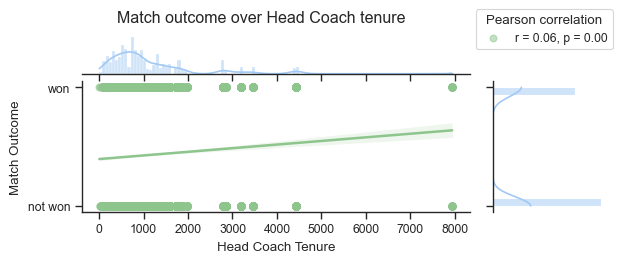

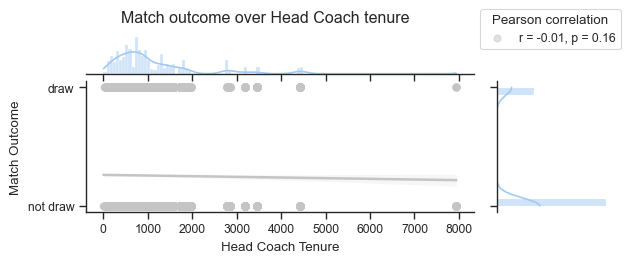

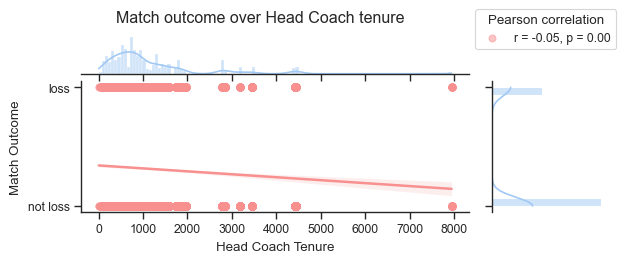

In [27]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

def plot_match_outcome_over_coach_tenure(data, y_value, y_label, color):
    # Create a jointplot
    # g = sns.jointplot(data=data, x='days_in_post', y=y_value, kind='reg', ratio = 3, marginal_ticks = False)
    g = sns.jointplot(data=data, x='days_in_post', y=y_value, kind='reg', 
                      scatter_kws={'alpha':0.5, 'color': sns.light_palette(color, as_cmap=True)(0.4)}, 
                      line_kws={'color': sns.light_palette(color, as_cmap=True)(0.4)}, 
                      ratio = 3, marginal_ticks = False)
    g.figure.set_figwidth(6)
    g.figure.set_figheight(2)
    g.figure.suptitle(f'Match outcome over Head Coach tenure', x = 0.4, y = 1.1)
    g.set_axis_labels('Head Coach Tenure', 'Match Outcome')
    
    # Legend
    r, p = pearsonr(data['days_in_post'], data[y_value])
    legend = g.ax_joint.legend([f'r = {r:.2f}, p = {p:.2f}'], loc='upper left', bbox_to_anchor=(1, 1.6))
    legend.set_title("Pearson correlation")
    
    # Set y-axis tick
    g.ax_joint.set_yticks([0, 1])
    g.ax_joint.set_yticklabels(['not ' + y_label, y_label])
    # Save the figure
    g.savefig(f'figures/{y_value}_over_coach_tenure.png')

plot_match_outcome_over_coach_tenure(match_results, 'win', 'won', 'green')
plot_match_outcome_over_coach_tenure(match_results, 'draw', 'draw', 'gray')
plot_match_outcome_over_coach_tenure(match_results, 'loss', 'loss', 'red')

## Correlation between days in post and teams performance

- could indicate that club keeps their well performing head-coaches
- could indicate that head coaches performance improve after time either because:
    - early low performance : coaches need some time once they are appointed to reach previous team performance
    - long term improvement of performance